In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
credits=pd.read_csv('creditcard.csv')
print(credits.head())
print(credits.shape)
print(credits.describe())
print(credits.info())

#using some tools to take idea for data

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
credits.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [4]:
Continuous_Columns = [
  'V1','V2','V3','V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
           'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
           'V24', 'V25', 'V26', 'V27', 'V28','Amount']
Carde_imputed = SimpleImputer(missing_values=np.nan, strategy="mean")

credits[Continuous_Columns]= Carde_imputed.fit_transform(credits[Continuous_Columns])
credits

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43659,41598,-0.538686,-0.635328,-0.041569,-3.022158,0.771776,3.556774,-1.418820,1.371999,-2.475053,...,-0.090409,-0.310254,0.168510,0.955413,-0.427495,-0.375891,0.051010,0.072416,60.010000,0.0
43660,41599,-0.349615,-2.860571,0.297766,0.801212,-1.523995,1.164260,0.037484,0.325220,0.862825,...,0.315370,-0.503099,-0.514747,-0.193890,-0.327091,0.875820,-0.144908,0.125368,745.560000,0.0
43661,41599,-3.001222,2.899766,0.726874,-0.729992,-0.312792,-0.735557,0.960944,-0.276141,2.128747,...,-0.645540,-0.613956,0.111663,0.338567,0.268357,0.076981,1.184716,0.491066,8.990000,0.0
43662,41599,1.042342,-0.390001,-0.463680,-1.737393,0.450611,0.604354,0.068099,0.278030,0.555053,...,-0.137137,-0.286887,0.143336,-0.986810,0.135599,-0.185344,0.035590,-0.008304,48.000000,0.0


In [5]:
credits.isnull().sum().value_counts()

,count
0,30
1,1


In [6]:
Classes=credits['Class'].value_counts()
Classes

,count
Class,
0.0,43529
1.0,134


([<matplotlib.patches.Wedge at 0x7d7f72c942d0>,
 [Text(-1.0999488751019084, 0.010605289342890118, 'Not Fraud'),
  Text(1.099948878557492, -0.010604930934053144, 'Fraud')],
 [Text(-0.59997211369195, 0.005784703277940064, '99.69%'),
  Text(0.5999721155768137, -0.005784507782210805, '0.31%')])

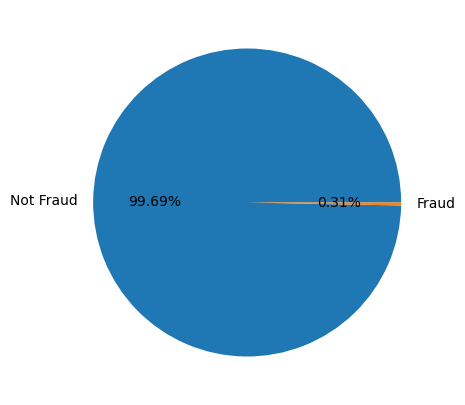

In [7]:
plt.figure(figsize=(5,5))
plt.pie(Classes,labels=['Not Fraud','Fraud'],autopct='%1.2f%%')

In [8]:
# from counting the classes we can show the data has two classes the data is not balance
#we support this with pie plot

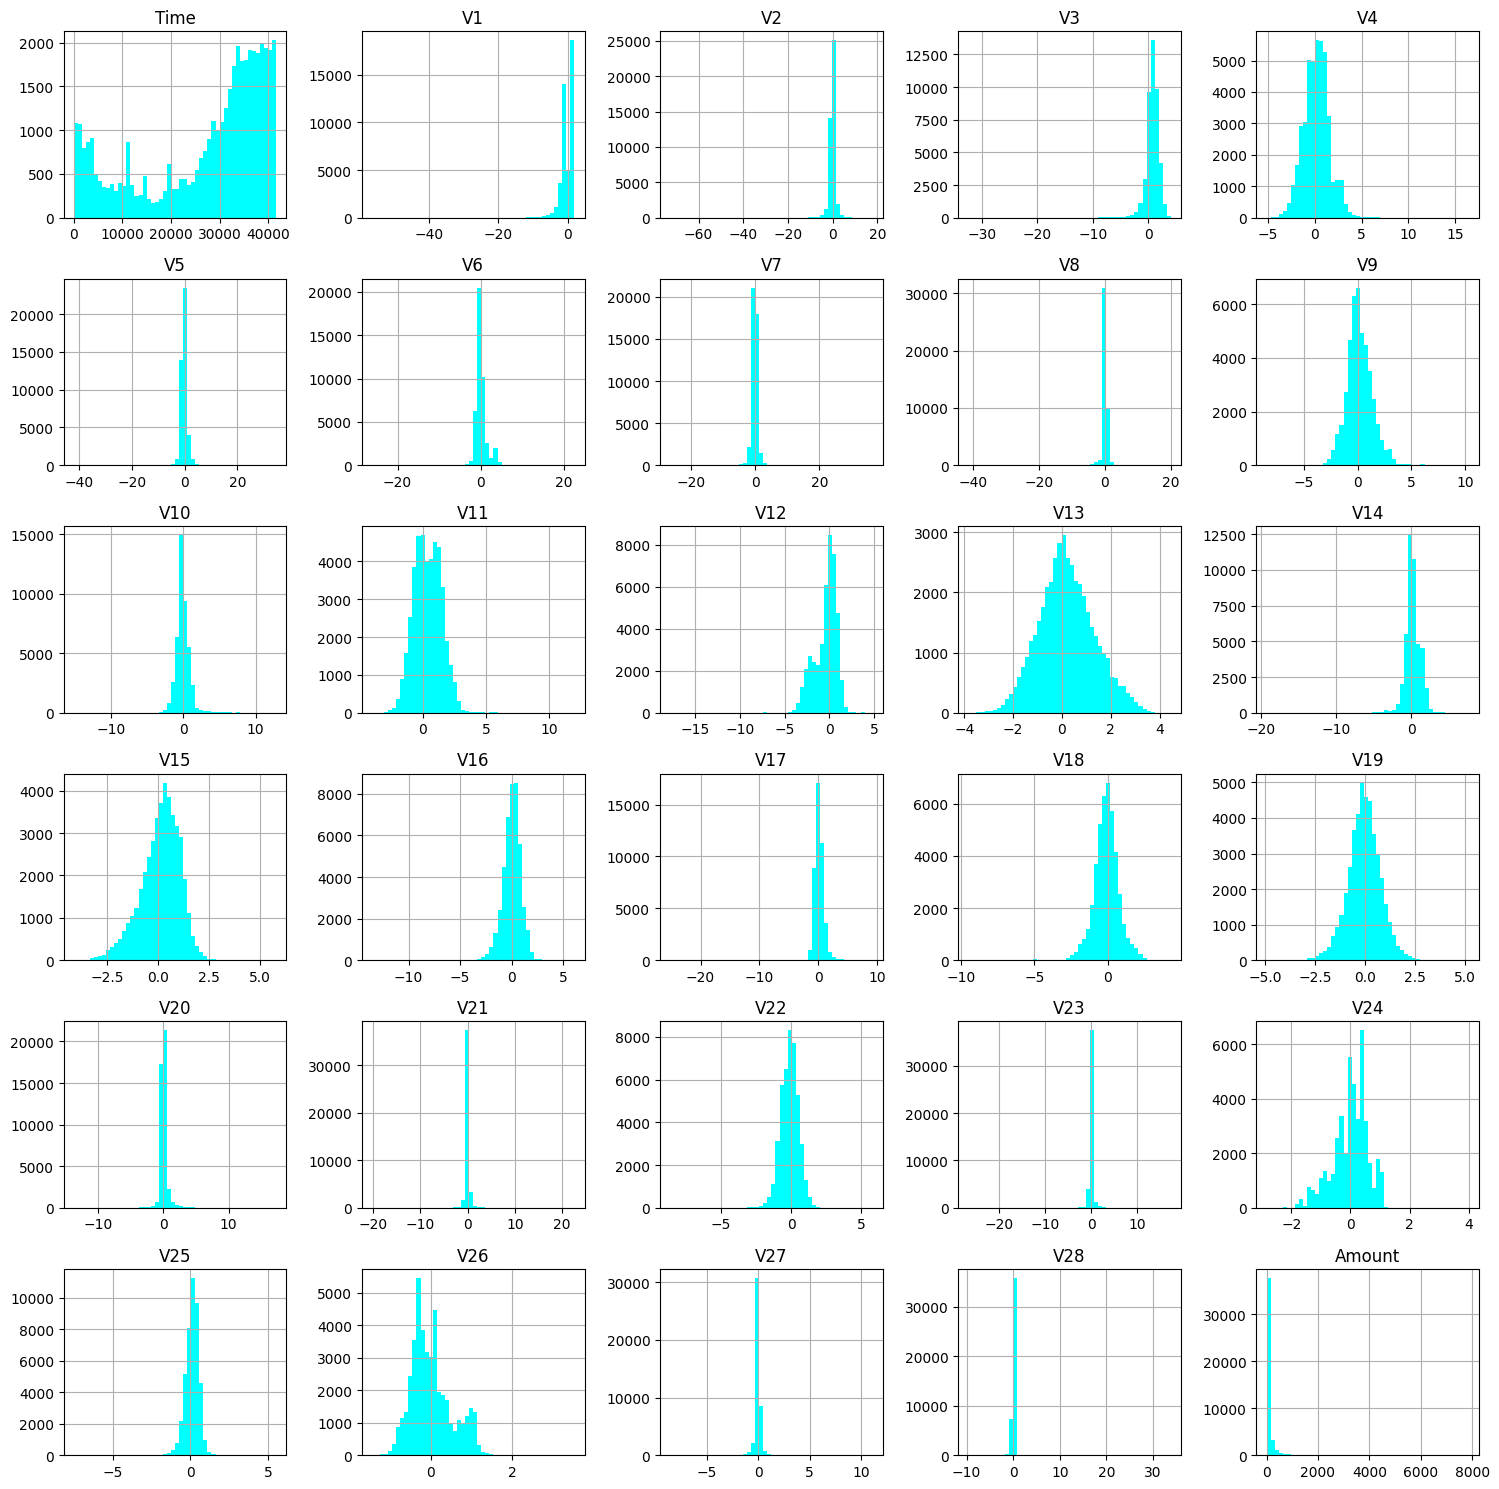

In [9]:
B_scaling=[col for col in credits.columns if col != 'Class']
credits[B_scaling].hist(bins=50,figsize=(15,15),color='cyan')
plt.tight_layout()

#plot to show data befor scaling

In [10]:
credit_card=credits.drop('Class',axis=1)
Scaling=StandardScaler()
Credits_Scaled=Scaling.fit_transform(credit_card)
Credits_Scaled
#we drop column of class because if apply scaling on class the class it will be ruined
#we apply scale to all data without class we chose StandardScaler not MinMaxScaler  becuas
#It gives more accurate results in PCA and K-Means.
#It scales all features to the same variance scale, without distorting the distribution.

array([[-2.09821150e+00, -5.98753685e-01, -6.46726235e-02, ...,
         3.24477250e-01, -7.64328372e-02,  2.48729013e-01],
       [-2.09821150e+00,  7.57457379e-01,  1.45311412e-01, ...,
        -4.06059180e-02,  2.80989829e-02, -3.67493777e-01],
       [-2.09813346e+00, -5.97981377e-01, -8.49874539e-01, ...,
        -1.59369913e-01, -1.89500715e-01,  1.20932023e+00],
       ...,
       [ 1.14794587e+00, -1.47116692e+00,  1.77695815e+00, ...,
         3.01674603e+00,  1.41984648e+00, -3.41071647e-01],
       [ 1.14794587e+00,  6.77989747e-01, -2.61205323e-01, ...,
         7.35577762e-02, -3.91821279e-02, -1.77464140e-01],
       [ 1.14802391e+00,  7.58547921e-01,  2.21313718e-02, ...,
         4.44304605e-18,  0.00000000e+00,  5.96001670e-17]])

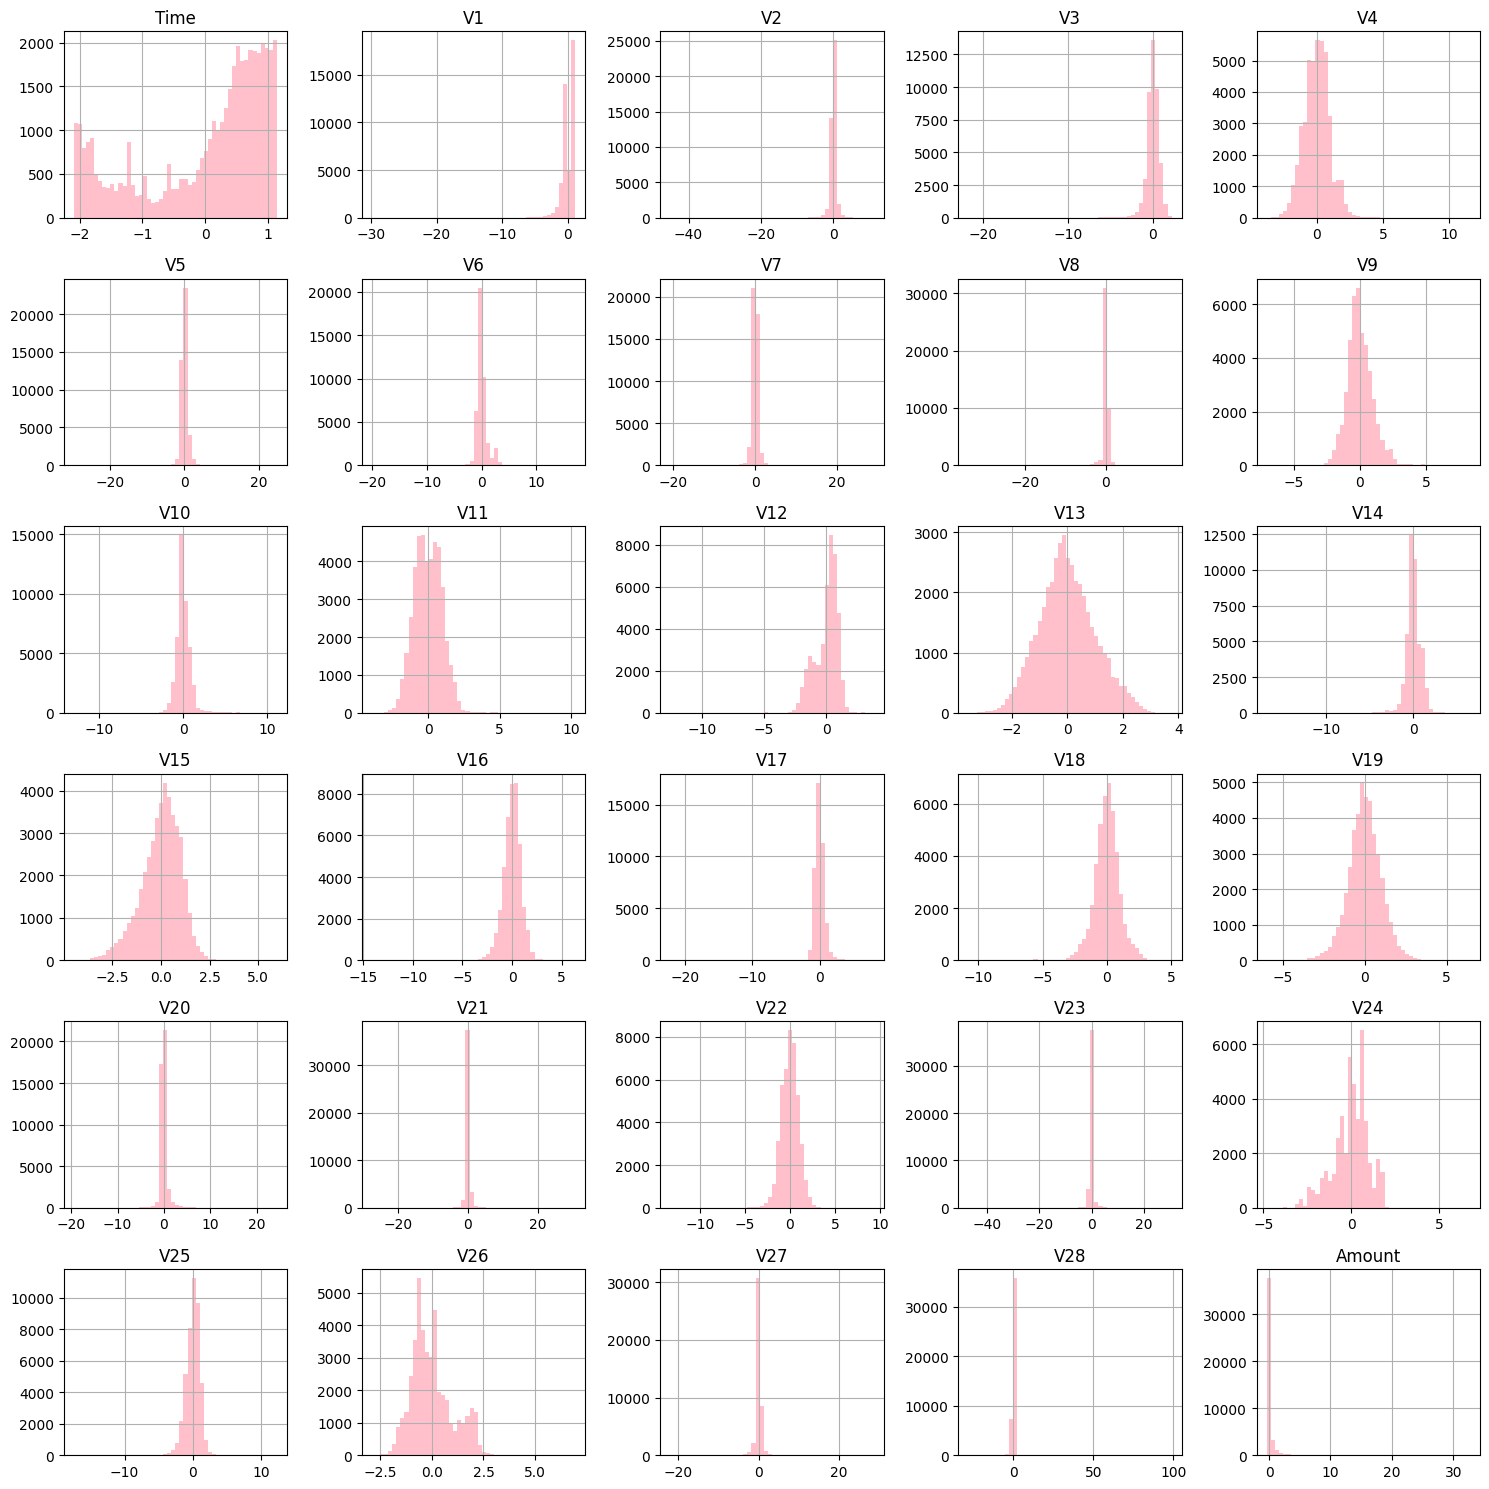

In [11]:
A_Scaling=pd.DataFrame(Credits_Scaled,columns=credit_card.columns)
A_Scaling.hist(bins=50,figsize=(15,15),color='pink')
plt.tight_layout()
#plot to show data after scaling
# The distributions after scaling show that all features are at the same scale (around zero),
#which is essential for improving the accuracy of algorithms like PCA and KMeans.

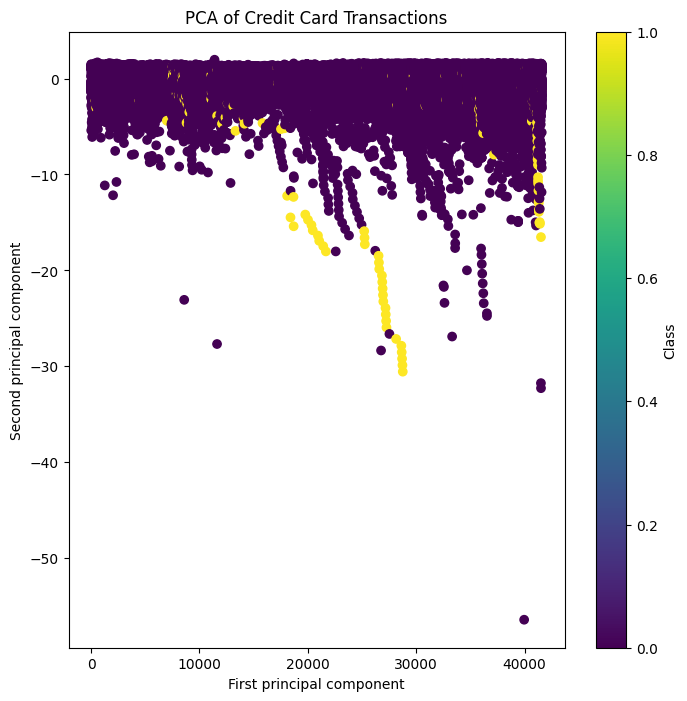

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(credits.iloc[:, 0], credits.iloc[:, 1], c=credits['Class'])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Credit Card Transactions")
plt.colorbar(label="Class")
plt.show()

In [13]:
# pca = PCA(n_components=2)
# Card_pca = pca.fit_transform(A_Scaling[Continuous_Columns])
# Card_pca.shape

In [14]:
# explained_var_ratio = pca.explained_variance_ratio_

# cumulative_variance = np.cumsum(explained_var_ratio)
# print(explained_var_ratio)
# print("______________________________\n")
# print(cumulative_variance)

In [15]:
# n_components_90 = np.argmax(cumulative_variance >= 0.90)+1
# n_components_95 = np.argmax(cumulative_variance >= 0.95)+1

# print(f" 90% variance: {n_components_90}")
# print(f" 95% variance: {n_components_95}")


In [16]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
Card_pca = pca.fit_transform(A_Scaling[Continuous_Columns])

explained_var_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_var_ratio)

print("Explained variance ratio per component:")
print(explained_var_ratio)
print("______________________________\n")
print("Cumulative variance:")
print(cumulative_variance)

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Minimum components to preserve 90% variance: {n_components_90}")
print(f"Minimum components to preserve 95% variance: {n_components_95}")


Explained variance ratio per component:
[0.09699677 0.06794022 0.06349587 0.04858318 0.04619566 0.04302399
 0.04176423 0.03851053 0.03795072 0.03714075 0.03559381 0.03475184
 0.03365602 0.03313818 0.03230102 0.03146252 0.02996812 0.02966473
 0.02913729 0.02823352 0.02608132 0.02523144 0.02365759 0.02341457
 0.02191103 0.01867124 0.01272611 0.00805237 0.00074535]
______________________________

Cumulative variance:
[0.09699677 0.164937   0.22843286 0.27701604 0.3232117  0.36623569
 0.40799992 0.44651044 0.48446116 0.52160191 0.55719572 0.59194757
 0.62560359 0.65874177 0.69104279 0.72250531 0.75247343 0.78213817
 0.81127545 0.83950898 0.8655903  0.89082174 0.91447933 0.93789389
 0.95980493 0.97847617 0.99120228 0.99925465 1.        ]
Minimum components to preserve 90% variance: 23
Minimum components to preserve 95% variance: 25


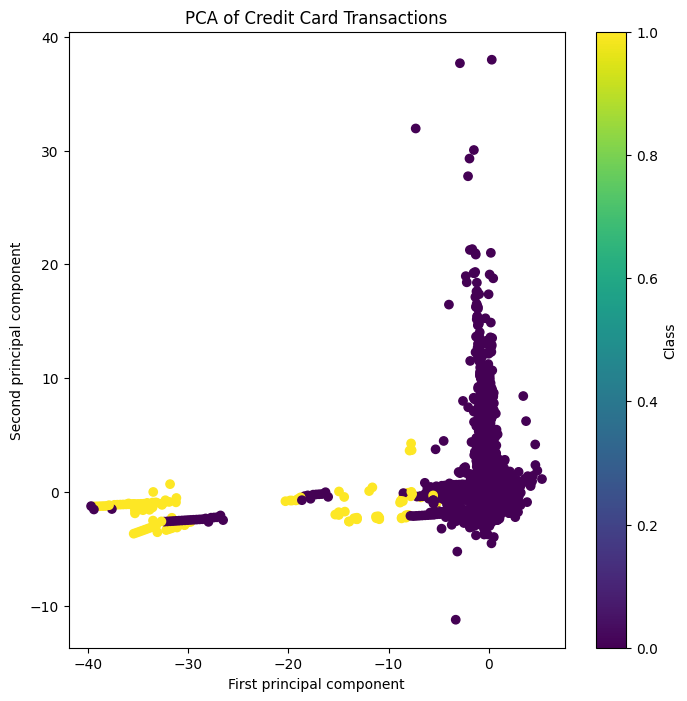

In [17]:
plt.figure(figsize=(8, 8))
plt.scatter(Card_pca[:, 0], Card_pca[:, 1], c=credits['Class'])
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Credit Card Transactions")
plt.colorbar(label="Class")
plt.show()

In [18]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (29, 29)


In [19]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 2.34887889e-01 -1.71040828e-01  4.05134259e-01 -1.85325103e-01
   2.51733854e-01  9.83782292e-02  3.18787271e-01 -2.40038460e-01
   1.38322294e-01  2.73804742e-01 -1.57463541e-01  1.75668096e-01
   1.11404513e-02  2.89188526e-01 -5.37864172e-03  2.57104809e-01
   3.34422494e-01  1.85706530e-01 -5.45710598e-02 -5.02542739e-02
  -6.55278071e-02  3.47886456e-02  4.21813767e-02  5.25535200e-03
  -2.78916468e-02  1.04175823e-02 -1.56099184e-01 -8.96423075e-04
  -2.76662236e-02]
 [-1.14329095e-01 -3.53989443e-01 -7.59547982e-02 -3.86686529e-03
  -2.08952557e-01  1.31031743e-01  2.40045854e-01 -4.68586910e-02
  -1.88737484e-01  2.68860839e-02 -1.90889883e-01  2.90112543e-01
  -2.62073301e-01 -1.77957876e-01  6.96126502e-02 -2.34339436e-03
  -5.95774956e-02 -8.98028980e-03  2.04155677e-02  3.16028841e-01
   9.73488634e-02  1.64382792e-02 -2.46984745e-02  7.75548895e-03
  -5.06204069e-03 -3.97743475e-03 -2.08082818e-02  2.16054129e-02
   5.98127655e-01]
 [-1.02448692e-01 -1.5

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_iter=300, random_state=42)
credits_tsne = tsne.fit_transform(Card_pca)

credits_tsne

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


array([[-0.7393255,  0.4426615],
       [ 0.7688685,  9.764204 ],
       [ 6.2190146, -1.7782384],
       ...,
       [-6.9818144, -7.8916936],
       [ 4.9938145, -2.161792 ],
       [-3.5163267,  8.577762 ]], dtype=float32)

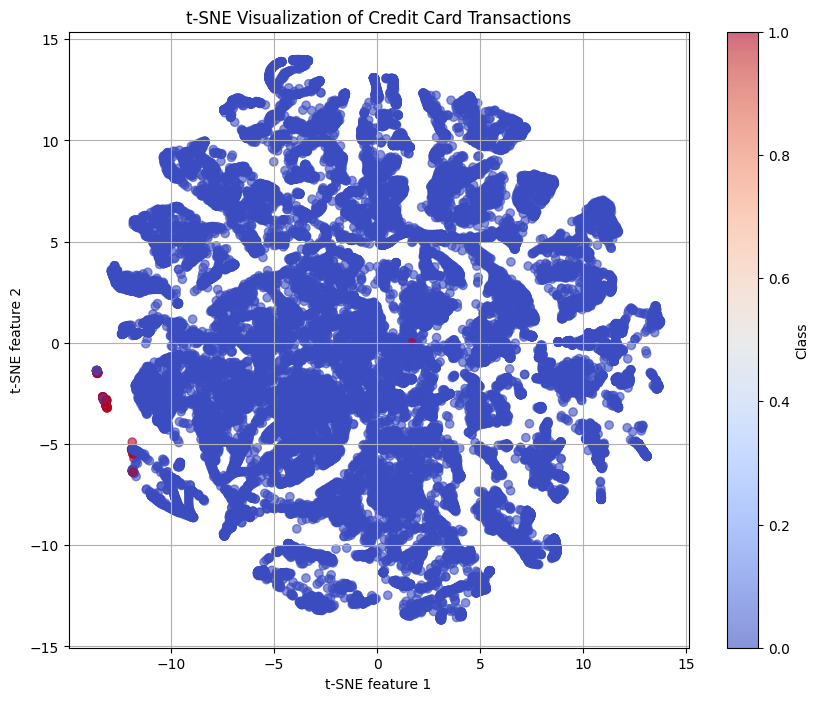

In [21]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(credits_tsne[:, 0], credits_tsne[:, 1],
                      c=credits['Class'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Class')
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.title("t-SNE Visualization of Credit Card Transactions")
plt.grid(True)
plt.show()


In [22]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(Card_pca)

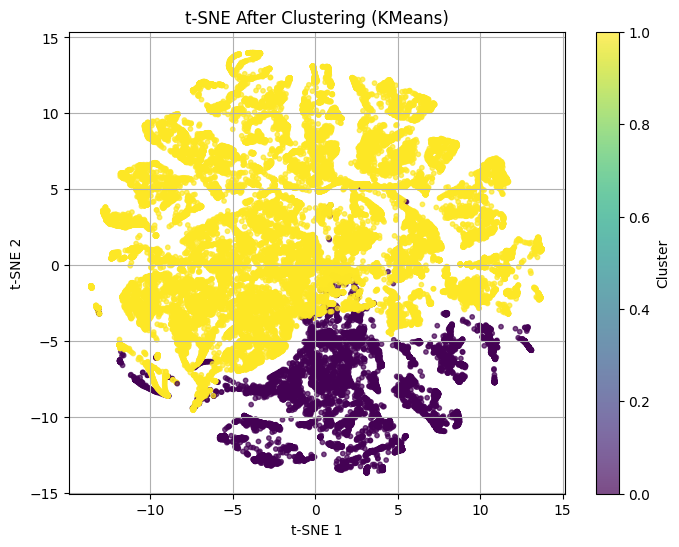

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(credits_tsne[:, 0], credits_tsne[:, 1], c=clusters, cmap='viridis', s=10, alpha=0.7)
plt.title("t-SNE After Clustering (KMeans)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.colorbar(label="Cluster")
plt.show()